#**Plant Seeding Project - Catalfio**

###**Context:**
Can you differentiate a weed from a crop seedling?
 - The ability to do so effectively can mean better crop yields and better stewardship of the environment.
 - The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, hasrecently released a dataset containing images of unique plants belonging to 12 species at several growth stages
 
###**Objective:**
To implement the techniques learnt as a part of the course.
###**Learning Outcomes:**
 - Pre-processing of image data.
 - Visualization of images.•Building CNN.•
 - Evaluate the Model.
 - The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.  Guide to solve the project seamlessly:

###**Load the data set and summary**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd                              # Import numpy
from skimage import data, io                     # Import skimage library (data - Test images and example data.
                                                 #                          io - Reading, saving, and displaying images.) 
import matplotlib.pyplot as plt                  # Import matplotlib.pyplot (Plotting framework in Python.)

import os                                        # This module provides a portable way of using operating system dependent functionality.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

from google.colab.patches import cv2_imshow      # To show images using cv2 module
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# library for creating data paths
import os

# library for randonly selecting data points
import random

# library for performing numerical computations
import numpy as np

# library for creating and showing plots
import matplotlib.pyplot as plt

# library for reading and showing images
import matplotlib.image as mpimg

# importing all the required sub-modules from keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from google.colab.patches import cv2_imshow

Loading data applying variables

In [3]:
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')
images = np.load('/content/drive/MyDrive/images.npy')

Shape of the data (labels)

In [4]:
labels.shape

(4750, 1)

Shape of the data (images)

In [5]:
images.shape

(4750, 128, 128, 3)

Description of the data

In [6]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


Viewing the first 8 images of the data

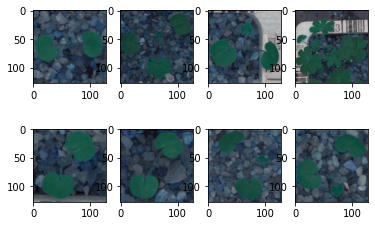

In [7]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

###**Perform an Exploratory Data Analysis on the images**

In [8]:
X = images

In [9]:
# The labels for images.
y = labels["Label"]

In [10]:
labels.describe()

,Label
count,4750
unique,12
top,Loose Silky-bent
freq,654


In [11]:
print(y[0])               # Label for 1st image.
print(y[2000])            # Label for 2001st image.

Small-flowered Cranesbill
Common Chickweed


Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: Label, dtype: int64

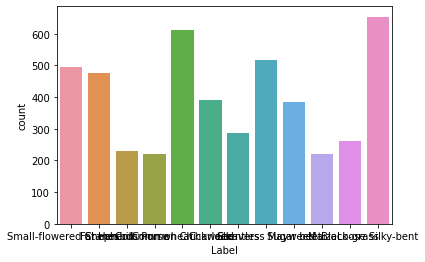

In [12]:
g = sns.countplot(y)
y.value_counts()

####**Mean Image**

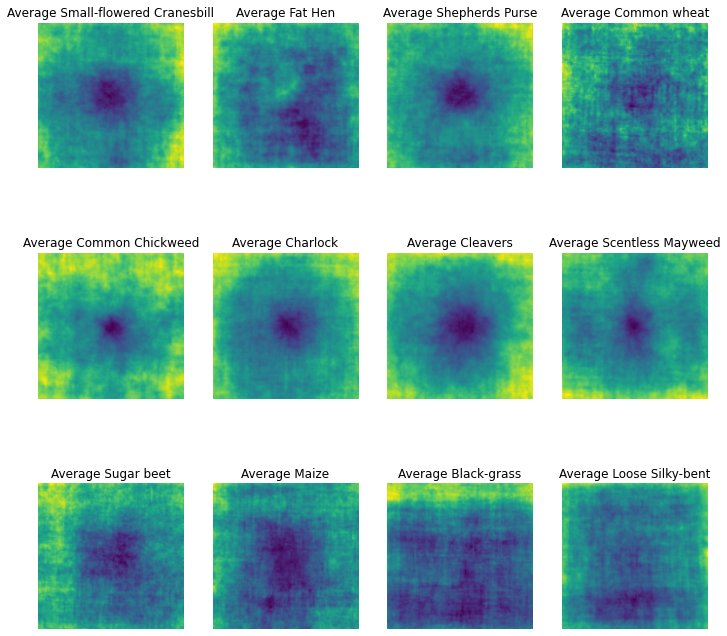

In [13]:
def find_mean_img(full_mat):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((150,150))
  
    return mean_img

CATEGORIES=labels['Label'].unique()
d={ i:[] for i in CATEGORIES}

for i in labels.index:
  gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  gray = cv2.resize(gray,(150,150))
  d[labels['Label'][i]].append(gray)

l=[]
for i in d.keys():
  l.append(find_mean_img(d[i]))

plt.subplots(figsize=(12,12))
for i in range(len(l)):
    plt.subplot(3,4,i + 1,title='Average '+list(d.keys())[i])
    plt.imshow(l[i])
    plt.axis('off')

###**Illustrate the insights based on EDA**

- There are two files of data: One the provides the labels for the images and one that provides the images.
- The shape of labels.csv is (4750, 1).
- The shape of images.npy is (4750, 128, 128, 3).
- The images are in color, 128 x 128.
- There are 12 uniques value counts in labels.
- The most frequesnt value count is Loose-Silky bent with 654.
- The first image is the Small-Flowered Cranesbill.
- The 2001 image is the Common Chickweed.
- The data ranges from the most frequent, Loose-Silky bent, to Common Wheat and Maize.  The frequencies are 654 and 221, respectively.
- The data seems somewhat evenly distributed visualizing the bar plot above.
- Visualizing the mean avg image for black grass, maize, loose silky-bent, these images have the most black in them recogninzing a pixels close to the zero value.
- Visualing the mean avg image for common chickweed, charlock cleavers have a lighter green hue.  Meaning those pixels will have the highes value.
- The remaining avg image value counts pixel intensity sits between the former and latter.

###**Data Pre-Processing**

####**Gaussian Blurring**

In [14]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 4750 numbers, each of which has 128, 128, 3 pixels. (It's the shape of the numpy array)

4750
(4750, 128, 128, 3)


In [15]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((4750, 128, 128, 3)) 

In [16]:
new_x.shape

(4750, 128, 128, 3)

In [17]:
# We can see that each digit is made of 128, 128, 3 pixels.
X[0].shape 

(128, 128, 3)

In [18]:
# In the following step, we iterate through each row, and convert the 1-D array of 16,384 pixels to an array of 128x128 pixels 2-D array. 
for idx, line in enumerate(X):
  new_x[idx] = line.reshape((128, 128, 3))

In [19]:
lst = ['a', 'b', 'c']
for idx, item in enumerate(lst):
  print(idx, item)

0 a
1 b
2 c


In [20]:
new_x.shape

(4750, 128, 128, 3)

In [21]:
# Here we see that the length of new dataset after application of Gaussian Blurring filter is same as previous one.
# i.e. Total number of images is same.
len(new_x)

4750

In [22]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


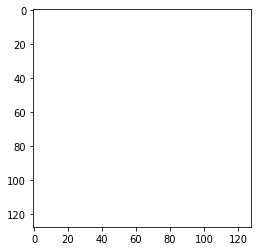

In [23]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[10], cmap='gray')
#plt.title(y[i])

###**Make Data Compatible**

####**Normalize the Data**

In [24]:
images = images / 255

####**Encoding the Labels**

In [25]:
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels)

####**Splitting the Data**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images,y , test_size=0.1, random_state=42,stratify=y)

In [27]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

###**Model Building**

In [28]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

####**ANN**

In [29]:
#Build the model
# 3 layers, 1 layer to flatten the image to a 128 x 128 = 49,152 vector
#           1 layer with 128 neurons and relu function
#           1 layer with 12 neurons and softmax function
#Create the neural network model
def create_model(): 
        model_ann = keras.Sequential([
            keras.layers.Flatten(input_shape=(128,128,3
                                              )),
            keras.layers.Dense(500,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(700,kernel_initializer='he_uniform', activation=tf.nn.relu),
            keras.layers.Dense(12, kernel_initializer='random_uniform',activation=tf.nn.softmax)
        ])
        #Compile the model
        #The loss function measures how well the model did on training , and then tries 
        #to improve on it using the optimizer
        model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model_ann

In [30]:
model_ann=create_model()
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 49152)             0         
                                                                 
 dense (Dense)               (None, 500)               24576500  
                                                                 
 dense_1 (Dense)             (None, 700)               350700    
                                                                 
 dense_2 (Dense)             (None, 12)                8412      
                                                                 
Total params: 24,935,612
Trainable params: 24,935,612
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Train the model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history=model_ann.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=200, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/200
53/54 [============================>.] - ETA: 0s - loss: 6.6349 - accuracy: 0.1126
Epoch 00001: val_accuracy improved from -inf to 0.17310, saving model to best_model.h5
54/54 [==============================] - 5s 48ms/step - loss: 6.6011 - accuracy: 0.1129 - val_loss: 2.3990 - val_accuracy: 0.1731
Epoch 2/200
52/54 [===========================>..] - ETA: 0s - loss: 2.2989 - accuracy: 0.2043
Epoch 00002: val_accuracy improved from 0.17310 to 0.22339, saving model to best_model.h5
54/54 [==============================] - 2s 44ms/step - loss: 2.2935 - accuracy: 0.2070 - val_loss: 2.2463 - val_accuracy: 0.2234
Epoch 3/200
53/54 [============================>.] - ETA: 0s - loss: 2.0571 - accuracy: 0.2807
Epoch 00003: val_accuracy improved from 0.22339 to 0.26901, saving model to best_model.h5
54/54 [==============================] - 2s 44ms/step - loss: 2.0555 - accuracy: 0.2810 - val_loss: 2.1197 - val_accuracy: 0.2690
Epoch 4/200
52/54 [===========================>..] - ETA: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


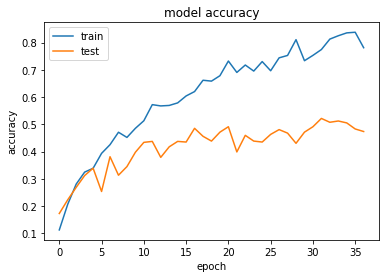

In [32]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
model_ann.evaluate(X_test,y_test)

15/15 [==============================] - 0s 8ms/step - loss: 1.8025 - accuracy: 0.4611


[1.8025155067443848, 0.46105262637138367]

- As we see here, the ANN does not show a good test accuracy, since ANNs are unable to capture spatial correlation characteristics of the image.

- Let's try Convolutional Neural Networks, which take in the whole image as a 2D matrix instead.

####**CNN with Dropout**

**Model 1:** CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively


In [34]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model = Sequential()
#
y_train=np.array(y_train)
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))
#
model.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

#
model.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

# 
model.add(Flatten())
model.add(Dense(1024, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 200  
batch_size = 64



es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history=model.fit(X_train, 
          y_train,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=40, #number of iterations over the entire dataset to train on
          batch_size=64,validation_split=0.20,callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training  

Epoch 1/40
54/54 [==============================] - ETA: 0s - loss: 2.4324 - accuracy: 0.1360
Epoch 00001: val_accuracy improved from -inf to 0.13567, saving model to best_model.h5
54/54 [==============================] - 23s 221ms/step - loss: 2.4324 - accuracy: 0.1360 - val_loss: 2.4397 - val_accuracy: 0.1357
Epoch 2/40
54/54 [==============================] - ETA: 0s - loss: 2.4161 - accuracy: 0.1415
Epoch 00002: val_accuracy did not improve from 0.13567
54/54 [==============================] - 9s 169ms/step - loss: 2.4161 - accuracy: 0.1415 - val_loss: 2.4355 - val_accuracy: 0.1345
Epoch 3/40
54/54 [==============================] - ETA: 0s - loss: 2.3670 - accuracy: 0.1813
Epoch 00003: val_accuracy improved from 0.13567 to 0.31462, saving model to best_model.h5
54/54 [==============================] - 10s 178ms/step - loss: 2.3670 - accuracy: 0.1813 - val_loss: 2.1615 - val_accuracy: 0.3146
Epoch 4/40
54/54 [==============================] - ETA: 0s - loss: 1.8501 - accuracy: 0.34

In [35]:
model.evaluate(X_test,np.array(y_test))

15/15 [==============================] - 2s 69ms/step - loss: 0.5278 - accuracy: 0.8442


[0.527834951877594, 0.8442105054855347]

- Decent testing accuracy score at .8042 and loss score with .62.  Similar to the val_accuracy, 8035 and val_loss, .5750.  This is suggests that the model is not overfitting.

###**Model Performance Improvement**

####**Convolutional Neural Network (CNN)**

Model 2: CNN with Dropout after Convolution and having two Dense layers with 16 & 8 units respectively



In [36]:
class conv_Layers:

  def __init__(self, nfilters, kernel_size, stride=1, 
               pool_size=2, leakyrelu_slope=0.1, dropc=0.0, bnorm=False):
    self.nfilters = nfilters
    self.kernel_size = kernel_size
    self.stride = stride
    self.pool_size = pool_size
    self.leakyrelu_slope = leakyrelu_slope
    self.dropfrac = dropc
    self.bnorm = bnorm
  
  def __call__(self, x):
    x = Conv2D(self.nfilters, kernel_size=self.kernel_size, 
               strides=self.stride, padding='same')(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0): 
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    x = MaxPool2D(self.pool_size)(x)
    return x

class dense_Layers:

  def __init__(self, nunits, leakyrelu_slope=0.1, dropd=0.0, bnorm=False):
    self.nunits = nunits
    self.leakyrelu_slope = leakyrelu_slope 
    self.dropfrac = dropd
    self.bnorm = bnorm

  def __call__(self, x):
    x = Dense(self.nunits)(x)
    x = LeakyReLU(self.leakyrelu_slope)(x)
    if (self.dropfrac > 0.0):
      x = Dropout(self.dropfrac)(x)
    if (self.bnorm):
      x = BatchNormalization()(x)
    return x

def LNmodel(in_shape, conv_filters, dense_filters, kernel_size, num_classes, lr,
            stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.0, dropd=0.0, bnorm=False):

  in_shape = X_train.shape[1:]
  i = Input(shape=in_shape)
  for ncl, nconvfilters in enumerate(conv_filters):
    if (ncl==0):
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(i)
    else:
      x = conv_Layers(nconvfilters, kernel_size,
                      stride, pool_size, leakyrelu_slope, dropc, bnorm)(x)

  x = Flatten()(x)

  for ndl, ndunits in enumerate(dense_filters):
    x = dense_Layers(ndunits, leakyrelu_slope, dropd, bnorm)(x)

  x = Dense(num_classes, activation='softmax')(x)

  ln_model  = Model(inputs=i, outputs=x)
  adam = optimizers.Adam(lr=lr)
  ln_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  return ln_model

In [37]:
lr = 0.001
kernelsize = 5
in_shape= X_train.shape[1:]
model_ln3 = LNmodel(in_shape, [8,16], [16,8], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 8)       0         
                                                                 
 dropout_6 (Dropout)         (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 16)        3216      
                                                             

In [38]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln3 = model_ln3.fit(X_train, y_train, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=256,
                                  shuffle=True, epochs=60,callbacks=[es,mc])

Epoch 1/60
16/16 [==============================] - ETA: 0s - loss: 2.5073 - accuracy: 0.0840
Epoch 00001: val_accuracy improved from -inf to 0.12150, saving model to best_model.h5
16/16 [==============================] - 5s 201ms/step - loss: 2.5073 - accuracy: 0.0840 - val_loss: 2.4724 - val_accuracy: 0.1215
Epoch 2/60
15/16 [===========================>..] - ETA: 0s - loss: 2.4786 - accuracy: 0.1154
Epoch 00002: val_accuracy improved from 0.12150 to 0.17523, saving model to best_model.h5
16/16 [==============================] - 2s 150ms/step - loss: 2.4786 - accuracy: 0.1152 - val_loss: 2.4732 - val_accuracy: 0.1752
Epoch 3/60
15/16 [===========================>..] - ETA: 0s - loss: 2.4717 - accuracy: 0.1078
Epoch 00003: val_accuracy improved from 0.17523 to 0.19626, saving model to best_model.h5
16/16 [==============================] - 2s 153ms/step - loss: 2.4718 - accuracy: 0.1079 - val_loss: 2.4667 - val_accuracy: 0.1963
Epoch 4/60
15/16 [===========================>..] - ETA: 0

 - This model unfortunately does not have a good test accuracy, and it appears to be overfitting on the training dataset. That means we need to increase the complexity of the model in our next attempt.

####**Convolutional Neural Network (CNN)**

Model 3: CNN with Dropout after Convolution and having two Dense layers with 512 & 256 Units respectively

In [39]:
lr = 0.001
kernelsize = 5
model_ln4 = LNmodel(in_shape, [8,16], [512,256], kernelsize, 12, lr,
                    stride=1, pool_size=2, leakyrelu_slope=0.1, dropc=0.25,
                    dropd=0.5, bnorm=False)
model_ln4.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 128, 128, 8)       608       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128, 128, 8)       0         
                                                                 
 dropout_10 (Dropout)        (None, 128, 128, 8)       0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 8)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 64, 16)        3216      
                                                           

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_model_ln4 = model_ln4.fit(X_train, y_train, 
                                  validation_split=0.1,
                                  verbose=1, batch_size=512, 
                                  shuffle=True, epochs=40,callbacks=[es,mc])

Epoch 1/40
8/8 [==============================] - ETA: 0s - loss: 2.9894 - accuracy: 0.1037
Epoch 00001: val_accuracy improved from -inf to 0.18458, saving model to best_model.h5
8/8 [==============================] - 7s 605ms/step - loss: 2.9894 - accuracy: 0.1037 - val_loss: 2.4624 - val_accuracy: 0.1846
Epoch 2/40
8/8 [==============================] - ETA: 0s - loss: 2.4320 - accuracy: 0.1310
Epoch 00002: val_accuracy did not improve from 0.18458
8/8 [==============================] - 2s 302ms/step - loss: 2.4320 - accuracy: 0.1310 - val_loss: 2.4005 - val_accuracy: 0.1332
Epoch 3/40
8/8 [==============================] - ETA: 0s - loss: 2.3474 - accuracy: 0.1799
Epoch 00003: val_accuracy did not improve from 0.18458
8/8 [==============================] - 2s 303ms/step - loss: 2.3474 - accuracy: 0.1799 - val_loss: 2.5595 - val_accuracy: 0.1659
Epoch 4/40
8/8 [==============================] - ETA: 0s - loss: 2.2283 - accuracy: 0.2339
Epoch 00004: val_accuracy did not improve from 0

- After increasing model complexity, we have achieved a better accuracy score but it can still be improved.
- CNN Model-3 is overfitting with training accuracy of .99 and a testing accuracy of .67.

###**Model Performance Evaluation**

####**Plotting the Train & Test Accuracy:**

#####**CNN Model 1**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


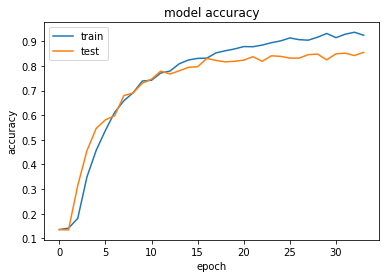

In [41]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#####**CNN Model 2**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


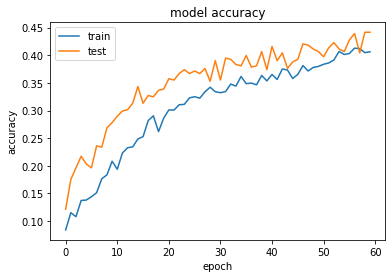

In [42]:
print(history_model_ln3.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln3.history['accuracy'])
plt.plot(history_model_ln3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#####**CNN Model 3**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


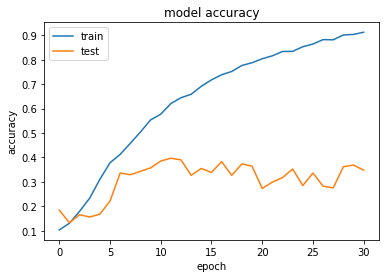

In [43]:
print(history_model_ln4.history.keys())
# summarize history for accuracy
plt.plot(history_model_ln4.history['accuracy'])
plt.plot(history_model_ln4.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#####**CNN Model 1**

In [44]:
model.evaluate(X_test,y_test)

15/15 [==============================] - 0s 27ms/step - loss: 0.5278 - accuracy: 0.8442


[0.527834951877594, 0.8442105054855347]

#####**CNN Model 2**

In [45]:
model_ln3.evaluate(X_test,y_test)

15/15 [==============================] - 0s 18ms/step - loss: 1.5220 - accuracy: 0.4421


[1.5219606161117554, 0.4421052634716034]

#####**CNN Model 3**

In [46]:
model_ln4.evaluate(X_test,y_test)

15/15 [==============================] - 0s 13ms/step - loss: 3.9621 - accuracy: 0.3411


[3.9621047973632812, 0.3410526216030121]

###**Model Performance Evaluation, Conclusion, and Key Takeaways**

 - As we have seen, ANNs do not work well with image data, because ANNs do not take 2-D images as input. They flatten the image and make it lose its spatial struture, whereas CNNs take the full 2D-image as input in order to perform feature extraction. So CNNs do not lose the image's spatial structure, which makes them more suitable for working with image datasets.
 - After Model Evaluation, CNN Model 1 has the best accuracy and loss scores at .80 and .62, repectively.  The CNN Model 1 is CNN with a dropout step.
 - CNN Model 3 has the second best Accuracy and loss scores at .70 and 1.2, repectively.
 - CNN Model 2 is by far the lowest scoring CNN model with an accuracy of just .35 and a loss of 2.12.
 - Decent testing accuracy score for CNN Model-1 at .8042 and loss score with .62.  Similar to the val_accuracy, 8035 and val_loss, .5750.  This is suggests that the model is not overfitting.
 - CNN Model-2, unfortunately, does not have a good test accuracy, and it appears to be overfitting on the training dataset. That means we need to increase the complexity of the model in our next attempt.
 - After increasing model complexity in CNN Model-3, we have achieved a better accuracy score but it can still be improved.
 - CNN Model-3 is overfitting with training accuracy of .99 and a testing accuracy of .67.
 - Through visualization you can confirm that the train and test are most similar in CNN model-1, followed by CNN Model-3 and, finally, CNN Model-2.  Notice in CNN Model-2's graph the variance is much greater between the train and test than the other 2 models which scored much better.
 -You can see the difference in models. The transfer CNN Model-1 has converged faster than the other 2 CNN models. Just check the loss values in both the models. For the basic CNN models, the loss ended with ~2.12 and 1.2, but for CNN Model-1 the loss ended with 0.61. That's good improvement just by using pre-trained architectures. 

######**Created by Stephen Catalfio**